![](https://upload.wikimedia.org/wikipedia/commons/thumb/3/31/Wish_logo.svg/250px-Wish_logo.svg.png)

# Sales of summer clothes in E-commerce Wish

## Este dataset contiene un listado de productos resultantes de la busqueda de la palabra "Summer" en el campo buscador de la plataforma Wish, disponibles a la venta para el periodo Julio 2020. 

### Posibles preguntas a responder durante el analisis: 
1. La utilizacion de Ad-Boosts favorece el exito de venta?
2. Los malos productos venden? Que relacion podemos encontrar entre la calidad de un producto y su exito?
3. Puede validarse la idea de sensibilidad ante los precios con descuento?
4. Que categorias son las que performan mejor?

#### Primer acercamiento al dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud


In [2]:
df = pd.read_csv("summer-products-with-rating-and-performance_2020-08.csv")

In [3]:
df.head()

,title,title_orig,price,retail_price,currency_buyer,units_sold,uses_ad_boosts,rating,rating_count,rating_five_count,...,merchant_rating_count,merchant_rating,merchant_id,merchant_has_profile_picture,merchant_profile_picture,product_url,product_picture,product_id,theme,crawl_month
0,2020 Summer Vintage Flamingo Print Pajamas Se...,2020 Summer Vintage Flamingo Print Pajamas Se...,16.00,14,EUR,100,0,3.76,54,26.0,...,568,4.128521,595097d6a26f6e070cb878d1,0,NaN,https://www.wish.com/c/5e9ae51d43d6a96e303acdb0,https://contestimg.wish.com/api/webimage/5e9ae...,5e9ae51d43d6a96e303acdb0,summer,2020-08
1,SSHOUSE Summer Casual Sleeveless Soirée Party ...,Women's Casual Summer Sleeveless Sexy Mini Dress,8.00,22,EUR,20000,1,3.45,6135,2269.0,...,17752,3.899673,56458aa03a698c35c9050988,0,NaN,https://www.wish.com/c/58940d436a0d3d5da4e95a38,https://contestimg.wish.com/api/webimage/58940...,58940d436a0d3d5da4e95a38,summer,2020-08
2,2020 Nouvelle Arrivée Femmes Printemps et Été ...,2020 New Arrival Women Spring and Summer Beach...,8.00,43,EUR,100,0,3.57,14,5.0,...,295,3.989831,5d464a1ffdf7bc44ee933c65,0,NaN,https://www.wish.com/c/5ea10e2c617580260d55310a,https://contestimg.wish.com/api/webimage/5ea10...,5ea10e2c617580260d55310a,summer,2020-08
3,Hot Summer Cool T-shirt pour les femmes Mode T...,Hot Summer Cool T Shirt for Women Fashion Tops...,8.00,8,EUR,5000,1,4.03,579,295.0,...,23832,4.020435,58cfdefdacb37b556efdff7c,0,NaN,https://www.wish.com/c/5cedf17ad1d44c52c59e4aca,https://contestimg.wish.com/api/webimage/5cedf...,5cedf17ad1d44c52c59e4aca,summer,2020-08
4,Femmes Shorts d'été à lacets taille élastique ...,Women Summer Shorts Lace Up Elastic Waistband ...,2.72,3,EUR,100,1,3.10,20,6.0,...,14482,4.001588,5ab3b592c3911a095ad5dadb,0,NaN,https://www.wish.com/c/5ebf5819ebac372b070b0e70,https://contestimg.wish.com/api/webimage/5ebf5...,5ebf5819ebac372b070b0e70,summer,2020-08


In [4]:
df.describe()

,price,retail_price,units_sold,uses_ad_boosts,rating,rating_count,rating_five_count,rating_four_count,rating_three_count,rating_two_count,...,badge_fast_shipping,product_variation_inventory,shipping_option_price,shipping_is_express,countries_shipped_to,inventory_total,has_urgency_banner,merchant_rating_count,merchant_rating,merchant_has_profile_picture
count,1573.000000,1573.000000,1573.000000,1573.000000,1573.000000,1573.000000,1528.000000,1528.000000,1528.000000,1528.000000,...,1573.000000,1573.000000,1573.000000,1573.000000,1573.000000,1573.000000,473.0,1.573000e+03,1573.000000,1573.000000
mean,8.325372,23.288620,4339.005086,0.432931,3.820896,889.659250,442.263743,179.599476,134.549738,63.711387,...,0.012715,33.081373,2.345200,0.002543,40.456453,49.821360,1.0,2.649583e+04,4.032345,0.143675
std,3.932030,30.357863,9356.539302,0.495639,0.515374,1983.928834,980.203270,400.516231,311.690656,151.343933,...,0.112075,21.353137,1.024371,0.050379,20.301203,2.562799,0.0,7.847446e+04,0.204768,0.350871
min,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,1.000000,0.000000,6.000000,1.000000,1.0,0.000000e+00,2.333333,0.000000
25%,5.810000,7.000000,100.000000,0.000000,3.550000,24.000000,12.000000,5.000000,4.000000,2.000000,...,0.000000,6.000000,2.000000,0.000000,31.000000,50.000000,1.0,1.987000e+03,3.917353,0.000000
50%,8.000000,10.000000,1000.000000,0.000000,3.850000,150.000000,79.000000,31.500000,24.000000,11.000000,...,0.000000,50.000000,2.000000,0.000000,40.000000,50.000000,1.0,7.936000e+03,4.040650,0.000000
75%,11.000000,26.000000,5000.000000,1.000000,4.110000,855.000000,413.500000,168.250000,129.250000,62.000000,...,0.000000,50.000000,3.000000,0.000000,43.000000,50.000000,1.0,2.456400e+04,4.161797,0.000000
max,49.000000,252.000000,100000.000000,1.000000,5.000000,20744.000000,11548.000000,4152.000000,3658.000000,2003.000000,...,1.000000,50.000000,12.000000,1.000000,140.000000,50.000000,1.0,2.174765e+06,5.000000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1573 entries, 0 to 1572
Data columns (total 43 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   title                         1573 non-null   object 
 1   title_orig                    1573 non-null   object 
 2   price                         1573 non-null   float64
 3   retail_price                  1573 non-null   int64  
 4   currency_buyer                1573 non-null   object 
 5   units_sold                    1573 non-null   int64  
 6   uses_ad_boosts                1573 non-null   int64  
 7   rating                        1573 non-null   float64
 8   rating_count                  1573 non-null   int64  
 9   rating_five_count             1528 non-null   float64
 10  rating_four_count             1528 non-null   float64
 11  rating_three_count            1528 non-null   float64
 12  rating_two_count              1528 non-null   float64
 13  rat

In [6]:
df.nunique()

title                           1201
title_orig                      1203
price                            127
retail_price                     104
currency_buyer                     1
units_sold                        15
uses_ad_boosts                     2
rating                           192
rating_count                     761
rating_five_count                605
rating_four_count                440
rating_three_count               384
rating_two_count                 262
rating_one_count                 330
badges_count                       4
badge_local_product                2
badge_product_quality              2
badge_fast_shipping                2
tags                            1230
product_color                    101
product_variation_size_id        106
product_variation_inventory       48
shipping_option_name              15
shipping_option_price              8
shipping_is_express                2
countries_shipped_to              94
inventory_total                   10
h

<BarContainer object of 13 artists>

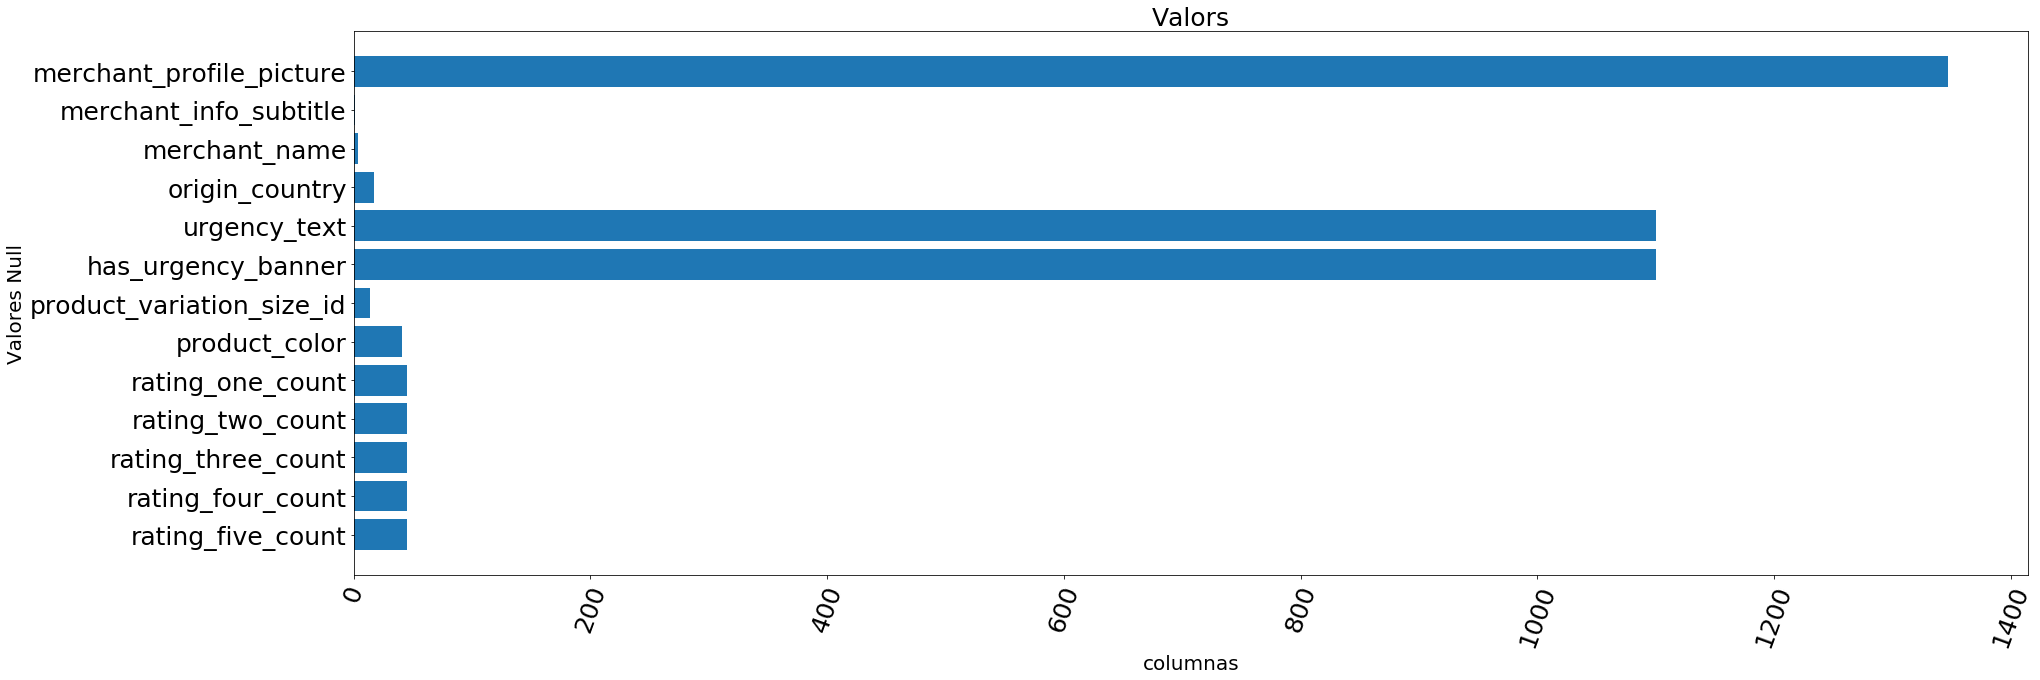

In [7]:
nan_columns = []
nan_values = []

for column in df.columns:
    if df[column].isnull().sum() > 0:
        nan_columns.append(column)
        nan_values.append(df[column].isnull().sum())

fig, ax = plt.subplots(1,1,figsize=(30,10))
plt.title('Valors', fontsize=25)
plt.xlabel('columnas', fontsize=20)
plt.ylabel('Valores Null', fontsize=20)
plt.xticks(rotation=70)
ax.tick_params(axis='both',labelsize=25)
ax.barh(nan_columns, nan_values)

Redondeamos las ventas de productos < a 10 unidades a 10.

In [8]:
def below_ten(units_sold):
    if units_sold < 10:
        return 10
    else:
        return units_sold
df['units_sold'] = df['units_sold'].apply(below_ten)

### 1- Analisis de ventas por Boost

Los que utilizan Ad-Boost son en promedio mas economicos o mas caros?

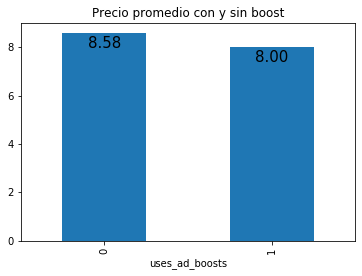

In [31]:
precio_promedio = df.groupby("uses_ad_boosts")["price"].mean().plot.bar(title='Precio promedio con y sin boost')
for bar in precio_promedio.patches:
    precio_promedio.annotate(format(bar.get_height(), '.2f'), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, -10),
                   textcoords='offset points')

Podemos ver que en promedio los productos que utilizan Boosts son un %7 mas baratos.

Y que hay respecto del Ranking de los productos que lo usan?

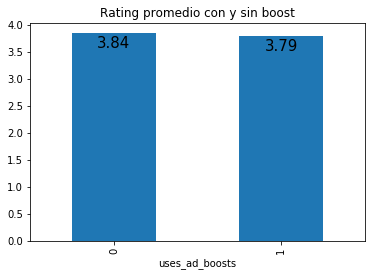

In [32]:
ranting_promedio = df.groupby("uses_ad_boosts")["rating"].mean().plot.bar(title='Rating promedio con y sin boost')
for bar in ranting_promedio.patches:
    ranting_promedio.annotate(format(bar.get_height(), '.2f'), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, -10),
                   textcoords='offset points')

Se observa un Rating mayor, en promedio, para los productos que no tienen Ad Boost.

Veamos que porcentaje de ventas utiliza boost.

In [11]:
porcentaje_boosts = df['uses_ad_boosts'].value_counts()[1] / len(df['uses_ad_boosts'])
print('Percent of products using ad boosts: {:.2%}'.format(porcentaje_boosts))


Percent of products using ad boosts: 43.29%


Y si analizamos las ventas por volumen, desagregando si utilizo o no ad_boost.

Text(0.5, 1.0, 'Utilizacion de Ad_Boost desagregado por cantidad vendida')

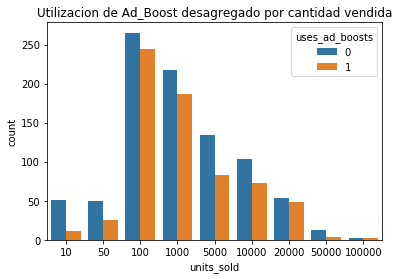

In [33]:
sns.countplot(x='units_sold', hue='uses_ad_boosts', data=df)
plt.title('Utilizacion de Ad_Boost desagregado por cantidad vendida')

Al parecer no hay un impacto notorio entre la utilizacion de boosts y el volumen de venta, hay productos que performan perfectamente sin la inversion en boosts.

## Analisis de calidad y performance de productos

Vamos a ver los Ratings de todos los Porductos, sin importar el volumen de venta.

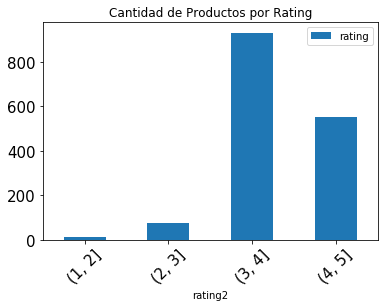

In [13]:
df["rating2"] = pd.cut(x=df.rating, bins = [1,2,3,4,5])
grafico2 = df.groupby("rating2").agg({"rating": "count"}).plot.bar(title = 'Cantidad de Productos por Rating',rot=45, fontsize=15)


Habiamos visto que hay valores nulos en las columnas de Rankings, vamos a chequear estos datos.

In [14]:
df[df['rating_five_count'].isnull()==True][['rating', 'rating_count',
        'rating_five_count', 'rating_four_count', 'rating_three_count','rating_two_count', 'rating_one_count']]

,rating,rating_count,rating_five_count,rating_four_count,rating_three_count,rating_two_count,rating_one_count
74,5.0,0,NaN,NaN,NaN,NaN,NaN
112,5.0,0,NaN,NaN,NaN,NaN,NaN
126,5.0,0,NaN,NaN,NaN,NaN,NaN
189,5.0,0,NaN,NaN,NaN,NaN,NaN
216,5.0,0,NaN,NaN,NaN,NaN,NaN
248,5.0,0,NaN,NaN,NaN,NaN,NaN
309,5.0,0,NaN,NaN,NaN,NaN,NaN
346,5.0,0,NaN,NaN,NaN,NaN,NaN
348,5.0,0,NaN,NaN,NaN,NaN,NaN
375,5.0,0,NaN,NaN,NaN,NaN,NaN


Se observa que hay algunos Productos que tienen 5 Rating, pero 0 en recuento.

In [15]:
df.loc[df["rating_count"]==0, "product_id"].count()

45

Vamos a ver los Ratings pero segmentando segun el volumen de venta de los porductos

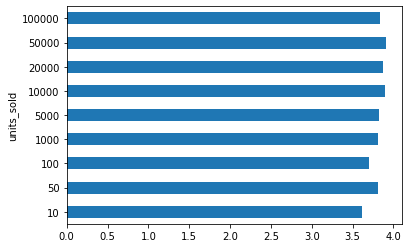

In [16]:
df[df['rating_count'] != 0].groupby('units_sold')['rating'].mean().plot.barh()

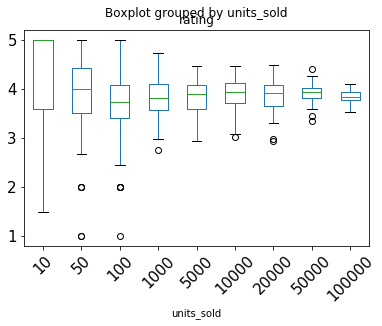

In [17]:
df.boxplot(column='rating', by ='units_sold', grid = False, rot=45, fontsize=15)
# df[df['rating_count'] != 0].groupby('units_sold')['rating'].mean()

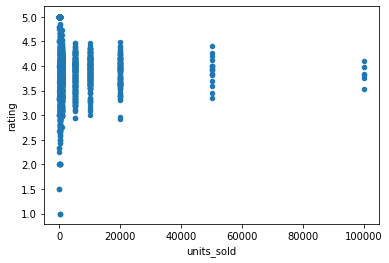

In [18]:
df.plot.scatter(x='units_sold',y='rating')

## Analisis de Precios y la relacion con la atraccion hacia el cliente

Primero vamos a definir una dimension que nos indique los casos en los que hay descuento

In [19]:
def tiene_descuento(x):
    if x['retail_price'] > x['price']:
        return 'con_descuento'
    else:
        return 'sin_descuento'
df['tiene_descuento'] = df.apply(tiene_descuento, axis=1)

,retail_price,price
count,1573.000000,1573.000000
mean,23.288620,8.325372
std,30.357863,3.932030
min,1.000000,1.000000
25%,7.000000,5.810000
50%,10.000000,8.000000
75%,26.000000,11.000000
max,252.000000,49.000000


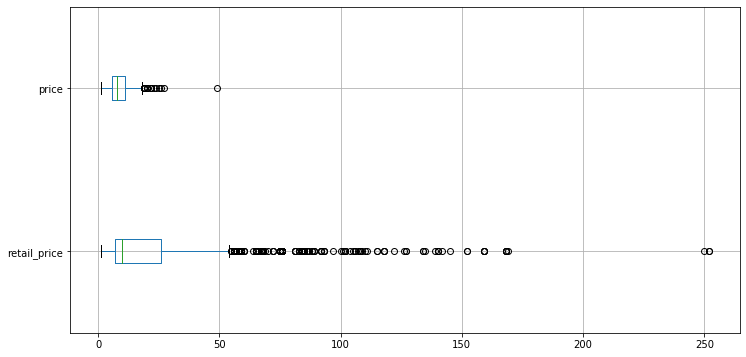

In [20]:
df[['retail_price','price']].plot.box(vert=False,figsize=(12,6), grid = 'on')
df[['retail_price','price']].describe()

* Con el diagrama de caja podemos ver facilmente los outliers y quartiles de las dimesiones price y retail_price.
* Hay un precio de 49 que es claramente un outlier que esta claramente alejado del rango interquartil.
* El boxplot de retail_price esta mucho mas disperso

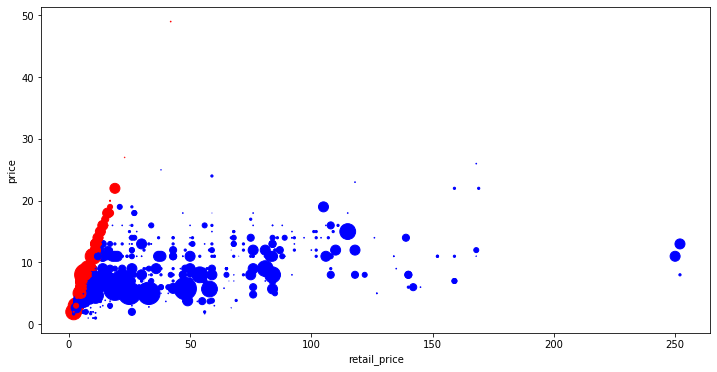

In [21]:
col = df.tiene_descuento.map({'con_descuento':'b', 'sin_descuento':'r'})
df.plot(kind='scatter',x='retail_price',y='price',c=col,s=df["units_sold"]/200,figsize=(12,6))

*

In [22]:
print('% con descuento: ', df['tiene_descuento'].value_counts()['con_descuento'] / len(df['tiene_descuento'])*100)

% con descuento:  52.193261284170376


In [23]:
df.groupby('units_sold').agg({'price':'mean','retail_price':'mean','units_sold':'sum','product_id':'count'}).eval('descuentos_medio = 1-price /retail_price').round(2)

,price,retail_price,units_sold,product_id,descuentos_medio
units_sold,,,,,
10,8.59,32.65,630,63,0.74
50,7.85,19.66,3800,76,0.60
100,8.08,22.70,50900,509,0.64
1000,8.59,24.78,405000,405,0.65
5000,8.48,20.43,1085000,217,0.58
10000,8.31,20.66,1770000,177,0.60
20000,8.73,26.93,2060000,103,0.68
50000,6.96,27.88,850000,17,0.75
100000,6.07,25.67,600000,6,0.76


In [24]:
pd.crosstab(df['tiene_descuento'], df['units_sold'])

units_sold,10,50,100,1000,5000,10000,20000,50000,100000
tiene_descuento,,,,,,,,,
con_descuento,39,46,285,218,94,79,47,8,5
sin_descuento,24,30,224,187,123,98,56,9,1


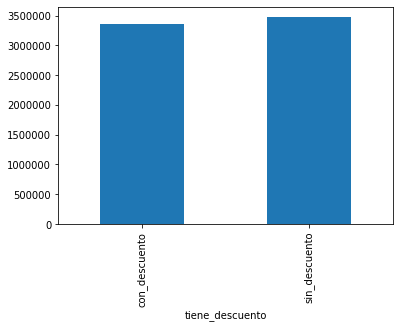

In [25]:
df.groupby("tiene_descuento")["units_sold"].sum().plot.bar()

Como vemos en la tabla de productos con/sin descuento, hay mayor proporcion con descuento en los productos que venden menos de 1000 unidades y en los top de ventas la relacion es inversa (+ productos sin descuento). Pero por otro lado vemos que estos ultimos son los que en promedio tienen mayores niveles de descuento.

### 4- Analisis de Categorias

(-0.5, 1919.5, 1079.5, -0.5)

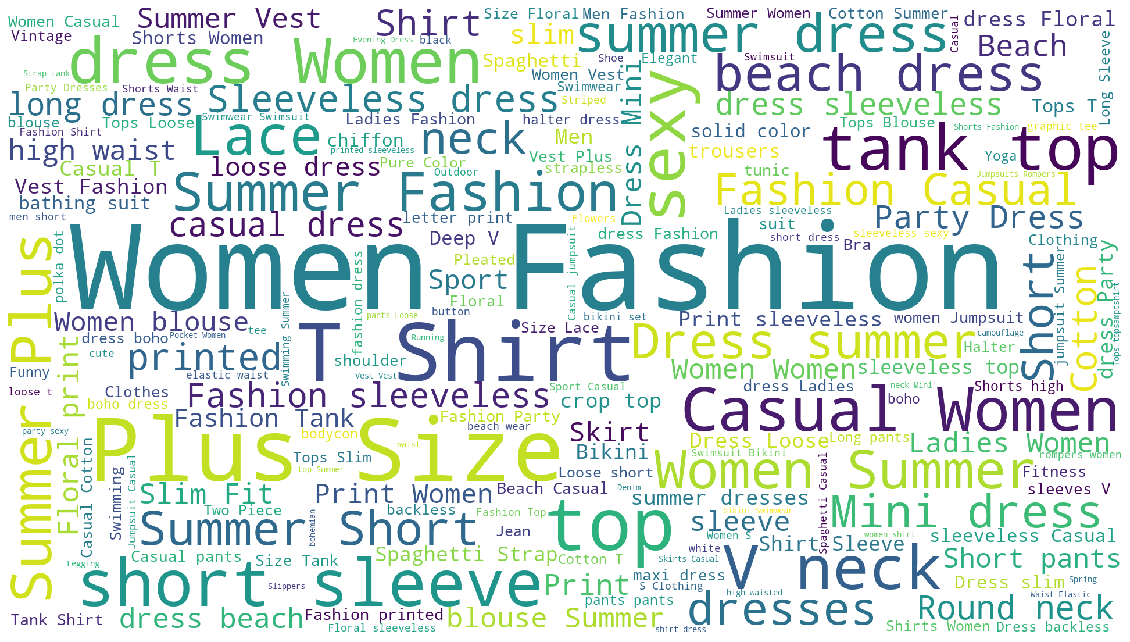

In [26]:
plt.subplots(figsize=(20,35))
wordcloud = WordCloud(
                          background_color='White',
                          width=1920,
                          height=1080
                         ).generate(" ".join(df.tags))
plt.imshow(wordcloud)
plt.axis('off')

Podemos concluir que el dataset esta principalmente basado en productos femeninos.